In [32]:
import pandas as pd
from pandas_datareader import data, wb
import seaborn as sns
import numpy as np
import datetime
%matplotlib inline 

In [33]:
imported_data = pd.read_csv('eurusd_w.csv')

In [35]:
imported_data.set_index(imported_data['Data'] , inplace=True)
imported_data.drop(['Data'],axis=1,inplace=True)

In [36]:
imported_data['Count'] = ""
for price in range(0,len(imported_data)):
    if imported_data.iloc[price,3] > imported_data.iloc[price,0]:
        imported_data.iloc[price,4] = 1 
    elif imported_data.iloc[price,3] < imported_data.iloc[price,0]:
        imported_data.iloc[price,4] = -1

In [37]:
agg_plus = int(1)
agg_minus = int(-1)
imported_data['Sum'] = ""
for count in range(0,len(imported_data)-1):
    if (imported_data.iloc[count+1,4] == imported_data.iloc[count,4]) & (imported_data.iloc[count+1,4] == 1) :
        agg_plus += int(1)
        imported_data.iloc[count+1,5] = int(agg_plus)
    elif (imported_data.iloc[count+1,4] == imported_data.iloc[count,4]) & (imported_data.iloc[count+1,4] == -1) :
        agg_minus += int(-1)
        imported_data.iloc[count+1,5] = int(agg_minus)
    elif (imported_data.iloc[count+1,4] != imported_data.iloc[count,4]) & (imported_data.iloc[count+1,4] == 1) :
        imported_data.iloc[count+1,5] = int(1)
    elif (imported_data.iloc[count+1,4] != imported_data.iloc[count,4]) & (imported_data.iloc[count+1,4] == -1) :
        imported_data.iloc[count+1,5] = int(-1)
    else:
         imported_data.iloc[count+1,5] = 0
    
    if imported_data.iloc[count+1,4] != imported_data.iloc[count,4]:
        agg_plus = int(1)
        agg_minus = int(-1)
        
imported_data.iloc[0,5] = imported_data.iloc[0,4]    

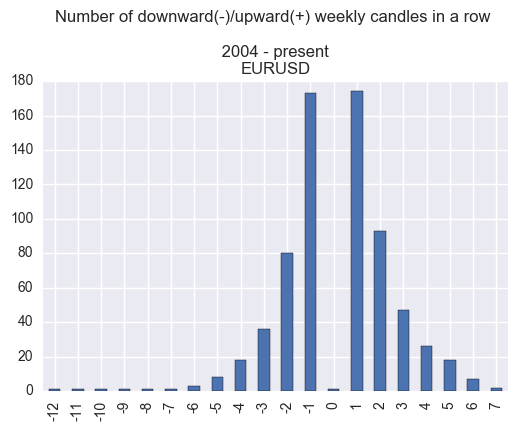

In [38]:
bar = pd.DataFrame(imported_data['Sum'].value_counts())
bar = bar.sort_index()
bar.plot(kind='bar', title='Number of downward(-)/upward(+) weekly candles in a row \n\n 2004 - present \nEURUSD', legend='')


In [40]:
imported_data[imported_data['Sum'] == 7]

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Count,Sum
Data,,,,,,
2004-11-05,1.2814,1.2978,1.2656,1.2973,1,7
2007-11-23,1.4666,1.4964,1.4620,1.4836,1,7
